In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_excel('/content/sportsref_download (4).xlsx')

# Taking a count of each game the Bulls played an opponent so far this 23-24 season (as of Feb. 5th, 2024)
df['count']=1
df

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,count
0,1,1.0,2023-10-25,23-281,CHI,NaN,OKC,L (-20),0,09:18:00,...,0.0,1.0,1.0,0.0,1.0,0.0,8.0,6.4,3.0,1
1,2,2.0,2023-10-27,23-283,CHI,NaN,TOR,W (+1),0,10:59:00,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.3,10.0,1
2,3,3.0,2023-10-28,23-284,CHI,@,DET,L (-16),0,14:59:00,...,3.0,3.0,0.0,0.0,0.0,0.0,5.0,4.7,-6.0,1
3,4,4.0,2023-10-30,23-286,CHI,@,IND,W (+7),0,10:06:00,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.5,-2.0,1
4,5,5.0,2023-11-01,23-288,CHI,@,DAL,L (-9),0,10:37:00,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,7.0,8.0,1
5,6,NaN,2023-11-03,23-290,CHI,NaN,BRK,L (-2),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,NaN,2023-11-04,23-291,CHI,@,DEN,L (-22),Inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,8,6.0,2023-11-06,23-293,CHI,NaN,UTA,W (+17),0,16:26:00,...,1.0,0.0,0.0,0.0,1.0,0.0,8.0,4.6,6.0,1
8,9,7.0,2023-11-08,23-295,CHI,NaN,PHO,L (-1),0,09:52:00,...,3.0,1.0,0.0,0.0,1.0,0.0,2.0,2.4,-4.0,1
9,10,8.0,2023-11-12,23-299,CHI,NaN,DET,W (+11),0,1900-01-01 02:38:00,...,1.0,3.0,3.0,0.0,0.0,3.0,13.0,14.3,19.0,1


In [5]:
# Omnitting the amount of Bulls game that Ayo Dosunmu DID NOT play, within the 23-24 season, from the data, using the minutes played ("MP") column.
df1 = df.dropna(subset=['MP'])
df1

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,count
0,1,1.0,2023-10-25,23-281,CHI,NaN,OKC,L (-20),0,09:18:00,...,0.0,1.0,1.0,0.0,1.0,0.0,8.0,6.4,3.0,1
1,2,2.0,2023-10-27,23-283,CHI,NaN,TOR,W (+1),0,10:59:00,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.3,10.0,1
2,3,3.0,2023-10-28,23-284,CHI,@,DET,L (-16),0,14:59:00,...,3.0,3.0,0.0,0.0,0.0,0.0,5.0,4.7,-6.0,1
3,4,4.0,2023-10-30,23-286,CHI,@,IND,W (+7),0,10:06:00,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.5,-2.0,1
4,5,5.0,2023-11-01,23-288,CHI,@,DAL,L (-9),0,10:37:00,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,7.0,8.0,1
7,8,6.0,2023-11-06,23-293,CHI,NaN,UTA,W (+17),0,16:26:00,...,1.0,0.0,0.0,0.0,1.0,0.0,8.0,4.6,6.0,1
8,9,7.0,2023-11-08,23-295,CHI,NaN,PHO,L (-1),0,09:52:00,...,3.0,1.0,0.0,0.0,1.0,0.0,2.0,2.4,-4.0,1
9,10,8.0,2023-11-12,23-299,CHI,NaN,DET,W (+11),0,1900-01-01 02:38:00,...,1.0,3.0,3.0,0.0,0.0,3.0,13.0,14.3,19.0,1
10,11,9.0,2023-11-13,23-300,CHI,@,MIL,L (-9),0,1900-01-01 01:30:00,...,2.0,1.0,0.0,0.0,1.0,4.0,5.0,2.1,-13.0,1
11,12,10.0,2023-11-15,23-302,CHI,NaN,ORL,L (-2),0,18:27:00,...,2.0,2.0,0.0,0.0,1.0,1.0,5.0,4.0,-6.0,1


In [7]:
df.describe()

,Rk,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,count
count,50.00000,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,46.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,50.0
mean,25.50000,24.50,3.729167,7.562500,0.468396,1.187500,3.125000,0.313478,0.958333,1.208333,...,2.583333,2.208333,0.791667,0.458333,1.000000,1.979167,9.604167,7.610417,-1.229167,1.0
std,14.57738,14.00,2.481760,3.769453,0.218549,1.178825,1.840733,0.281359,1.270924,1.458042,...,1.911147,1.662584,0.966642,0.713348,1.129865,1.246093,6.087097,6.401038,11.614810,0.0
min,1.00000,1.00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.600000,-23.000000,1.0
25%,13.25000,12.75,2.000000,4.000000,0.333000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,3.550000,-9.250000,1.0
50%,25.50000,24.50,3.000000,7.500000,0.483500,1.000000,3.000000,0.309500,0.000000,0.000000,...,2.000000,2.000000,0.500000,0.000000,1.000000,2.000000,8.000000,5.750000,-2.000000,1.0
75%,37.75000,36.25,6.000000,10.250000,0.625000,2.000000,4.000000,0.500000,2.000000,2.000000,...,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,12.575000,7.250000,1.0
max,50.00000,48.00,10.000000,16.000000,0.889000,4.000000,9.000000,1.000000,5.000000,6.000000,...,8.000000,6.000000,3.000000,3.000000,4.000000,4.000000,24.000000,24.900000,28.000000,1.0


In [6]:
# Grouping Dosunmu's stats by opponents that Ayo has played against this season.
# "Count" column will now reflect the frequency that Ayo has played against each respective opponent so far this season.
# Adding up all of the stats from each game played in order to calculate Ayo Dosunmu's average 3P%, FG%, and FT% for each opponent this season.
gamecount = df1.groupby('Opp')['count','FG', 'FGA', '3P', '3PA', 'FT', 'FTA'].sum().reset_index()

# Calculating Ayo Dosunmu's average 3P%, FG%, and FT% for each opponent this season, using the total FG, FGA, 3P, 3PA, FT, and FTA previously calculated above.
gamecount['FG%'] = gamecount['FG']/gamecount['FGA']
gamecount['3P%'] = gamecount['3P']/gamecount['3PA']
gamecount['FT%'] = gamecount['FT']/gamecount['FTA']

# Now that I calculated the averages, I will omit the columns that I will no longer need for my analysis
gc = gamecount.drop(columns=['FG', 'FGA', '3P', '3PA', 'FT', 'FTA'])

# Gathering stats that I want to analyze, combining chart with 'gc' chart previously made above.
nbanew = df1.groupby('Opp')['PTS', 'AST', 'TRB', 'BLK', 'STL', 'FGA', 'FG', '3PA', '3P', 'FTA', 'FT'].mean().reset_index()
ayostat = pd.merge(gc, nbanew, on='Opp')

# renaming columns to it's appropriate summarization
ayostat =  ayostat.rename(columns={'PTS':'PPG','AST':'APG','TRB':'RPG','BLK':'BPG','STL':'SPG','count':'GP','FG':'FGM/GP','FGA':'FGA/GP','3P':'3PM/GP','3PA':'3PA/GP','FT':'FTM/GP','FTA':'FTA/GP'})
ayostat



<ipython-input-6-1f931a281db9>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gamecount = df1.groupby('Opp')['count','FG', 'FGA', '3P', '3PA', 'FT', 'FTA'].sum().reset_index()
<ipython-input-6-1f931a281db9>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nbanew = df1.groupby('Opp')['PTS', 'AST', 'TRB', 'BLK', 'STL', 'FGA', 'FG', '3PA', '3P', 'FTA', 'FT'].mean().reset_index()


,Opp,GP,FG%,3P%,FT%,PPG,APG,RPG,BPG,SPG,FGA/GP,FGM/GP,3PA/GP,3PM/GP,FTA/GP,FTM/GP
0,ATL,1,0.428571,0.500000,0.833333,19.000000,4.000000,7.000000,0.000000,3.000000,14.000000,6.000000,4.000000,2.000000,6.000000,5.000000
1,BOS,1,0.400000,0.333333,0.500000,10.000000,2.000000,0.000000,0.000000,1.000000,10.000000,4.000000,3.000000,1.000000,2.000000,1.000000
2,BRK,1,0.666667,0.000000,0.500000,5.000000,2.000000,2.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,2.000000,1.000000
3,CHO,4,0.548387,0.500000,1.000000,10.500000,3.500000,2.250000,1.000000,1.250000,7.750000,4.250000,3.000000,1.500000,0.500000,0.500000
4,CLE,2,0.384615,0.200000,1.000000,7.000000,2.000000,3.000000,0.000000,0.000000,6.500000,2.500000,2.500000,0.500000,1.500000,1.500000
5,DAL,1,0.750000,0.666667,NaN,8.000000,1.000000,1.000000,0.000000,0.000000,4.000000,3.000000,3.000000,2.000000,0.000000,0.000000
6,DEN,1,0.428571,0.250000,1.000000,9.000000,3.000000,3.000000,1.000000,0.000000,7.000000,3.000000,4.000000,1.000000,2.000000,2.000000
7,DET,2,0.571429,0.333333,0.500000,9.000000,3.000000,2.000000,0.000000,1.500000,7.000000,4.000000,1.500000,0.500000,1.000000,0.500000
8,GSW,1,0.500000,0.666667,NaN,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,3.000000,2.000000,0.000000,0.000000
9,HOU,1,0.375000,0.500000,NaN,8.000000,3.000000,4.000000,0.000000,0.000000,8.000000,3.000000,4.000000,2.000000,0.000000,0.000000


In [39]:
# px.scatter(ayostat, x=ayostat.Opp, y=ayostat.PPG, color = ayostat.PPG, size= ayostat.PPG)

In [40]:
# px.scatter(df1, x=df1.Opp, y=df1.PTS, color = df1.PTS, size= df1.PTS)

In [10]:
nba23 = df1[df1.Rk < 35]
nba23.describe()
nba23

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,count
0,1,1.0,2023-10-25,23-281,CHI,NaN,OKC,L (-20),0,09:18:00,...,0.0,1.0,1.0,0.0,1.0,0.0,8.0,6.4,3.0,1
1,2,2.0,2023-10-27,23-283,CHI,NaN,TOR,W (+1),0,10:59:00,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.3,10.0,1
2,3,3.0,2023-10-28,23-284,CHI,@,DET,L (-16),0,14:59:00,...,3.0,3.0,0.0,0.0,0.0,0.0,5.0,4.7,-6.0,1
3,4,4.0,2023-10-30,23-286,CHI,@,IND,W (+7),0,10:06:00,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.5,-2.0,1
4,5,5.0,2023-11-01,23-288,CHI,@,DAL,L (-9),0,10:37:00,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,7.0,8.0,1
7,8,6.0,2023-11-06,23-293,CHI,NaN,UTA,W (+17),0,16:26:00,...,1.0,0.0,0.0,0.0,1.0,0.0,8.0,4.6,6.0,1
8,9,7.0,2023-11-08,23-295,CHI,NaN,PHO,L (-1),0,09:52:00,...,3.0,1.0,0.0,0.0,1.0,0.0,2.0,2.4,-4.0,1
9,10,8.0,2023-11-12,23-299,CHI,NaN,DET,W (+11),0,1900-01-01 02:38:00,...,1.0,3.0,3.0,0.0,0.0,3.0,13.0,14.3,19.0,1
10,11,9.0,2023-11-13,23-300,CHI,@,MIL,L (-9),0,1900-01-01 01:30:00,...,2.0,1.0,0.0,0.0,1.0,4.0,5.0,2.1,-13.0,1
11,12,10.0,2023-11-15,23-302,CHI,NaN,ORL,L (-2),0,18:27:00,...,2.0,2.0,0.0,0.0,1.0,1.0,5.0,4.0,-6.0,1


In [12]:
nba24 = df[df.Rk > 34]
nba24
# nba24.describe()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,count
34,35,33.0,2024-01-02,23-350,CHI,@,PHI,L (-13),0,1900-01-01 07:31:00,...,3.0,0.0,1.0,0.0,3.0,2.0,15.0,6.1,-19.0,1
35,36,34.0,2024-01-03,23-351,CHI,@,NYK,L (-16),0,1900-01-01 07:23:00,...,4.0,4.0,0.0,2.0,0.0,1.0,7.0,4.4,-11.0,1
36,37,35.0,2024-01-05,23-353,CHI,NaN,CHO,W (+13),1,1900-01-01 16:09:00,...,5.0,4.0,1.0,2.0,0.0,2.0,12.0,13.6,14.0,1
37,38,36.0,2024-01-08,23-356,CHI,@,CHO,W (+7),0,17:35:00,...,1.0,2.0,0.0,1.0,1.0,3.0,6.0,5.3,-3.0,1
38,39,37.0,2024-01-10,23-358,CHI,NaN,HOU,W (+5),0,18:01:00,...,4.0,3.0,0.0,0.0,0.0,0.0,8.0,7.7,-5.0,1
39,40,38.0,2024-01-12,23-360,CHI,NaN,GSW,L (-9),0,16:39:00,...,0.0,0.0,0.0,0.0,3.0,4.0,6.0,-0.6,-23.0,1
40,41,39.0,2024-01-13,23-361,CHI,@,SAS,W (+6),0,1900-01-01 05:20:00,...,2.0,4.0,1.0,0.0,2.0,4.0,21.0,18.7,7.0,1
41,42,40.0,2024-01-15,23-363,CHI,@,CLE,L (-18),0,19:13:00,...,3.0,3.0,0.0,0.0,0.0,3.0,10.0,8.5,6.0,1
42,43,41.0,2024-01-18,24-001,CHI,@,TOR,W (+6),0,1900-01-01 08:02:00,...,1.0,5.0,0.0,1.0,0.0,2.0,10.0,9.0,10.0,1
43,44,42.0,2024-01-20,24-003,CHI,NaN,MEM,W (+29),0,1900-01-01 03:55:00,...,6.0,4.0,1.0,1.0,3.0,1.0,20.0,18.7,28.0,1


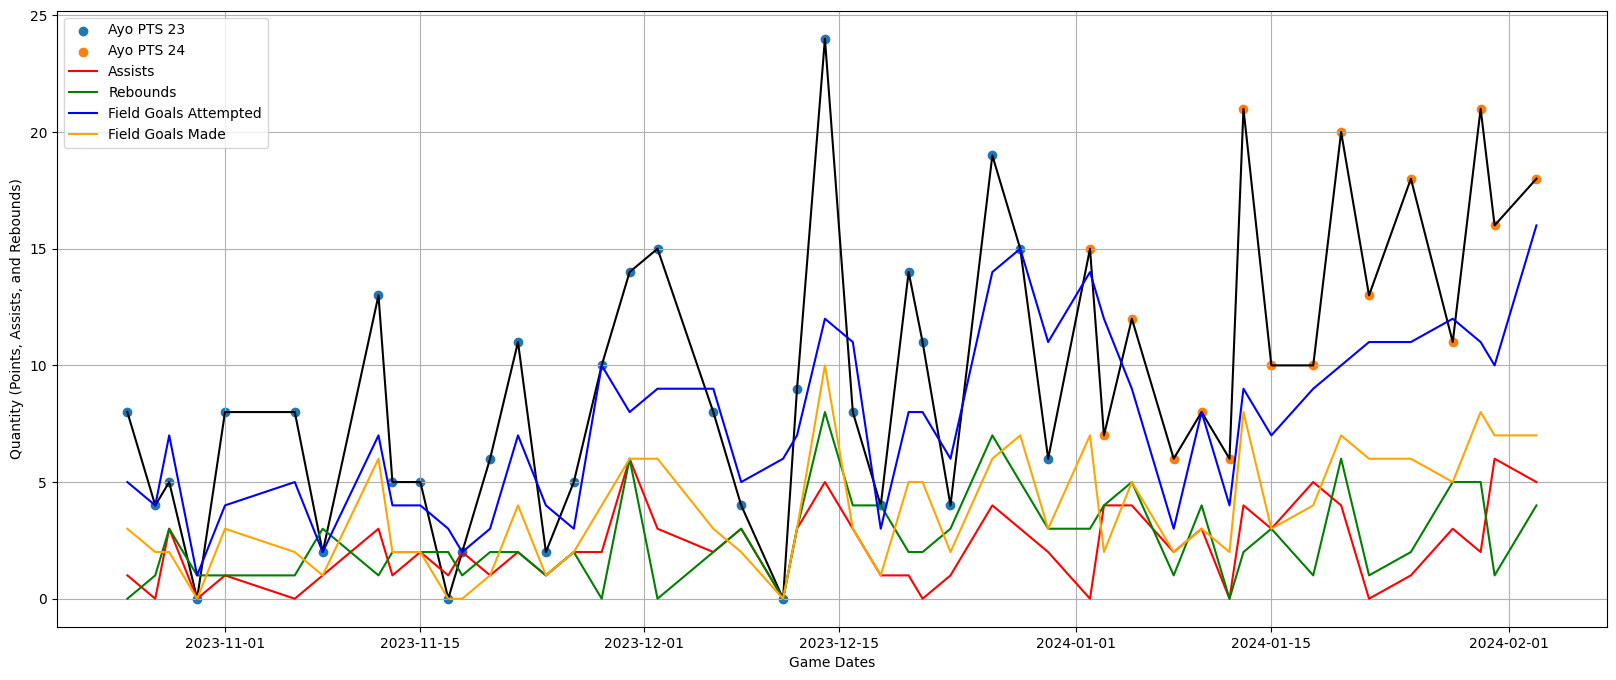

In [49]:
plt.figure(figsize=(20, 8))
plt.scatter(nba23['Date'], nba23['PTS'], label='Ayo PTS 23')
plt.scatter(nba24['Date'], nba24['PTS'], label='Ayo PTS 24')
plt.plot(df1['Date'], df1['PTS'], color = 'black')
plt.plot(df1['Date'], df1['AST'], color = 'red', label='Assists')
plt.plot(df1['Date'], df1['TRB'], color = 'green', label='Rebounds')
plt.plot(df1['Date'], df1['FGA'], color = 'blue', label='Field Goals Attempted')
plt.plot(df1['Date'], df1['FG'], color = 'orange', label='Field Goals Made')
plt.xlabel('Game Dates')
plt.ylabel('Quantity (Points, Assists, and Rebounds)')
plt.grid()
plt.legend()
# plt.savefig('filename.png')
# files.download('filename.png')

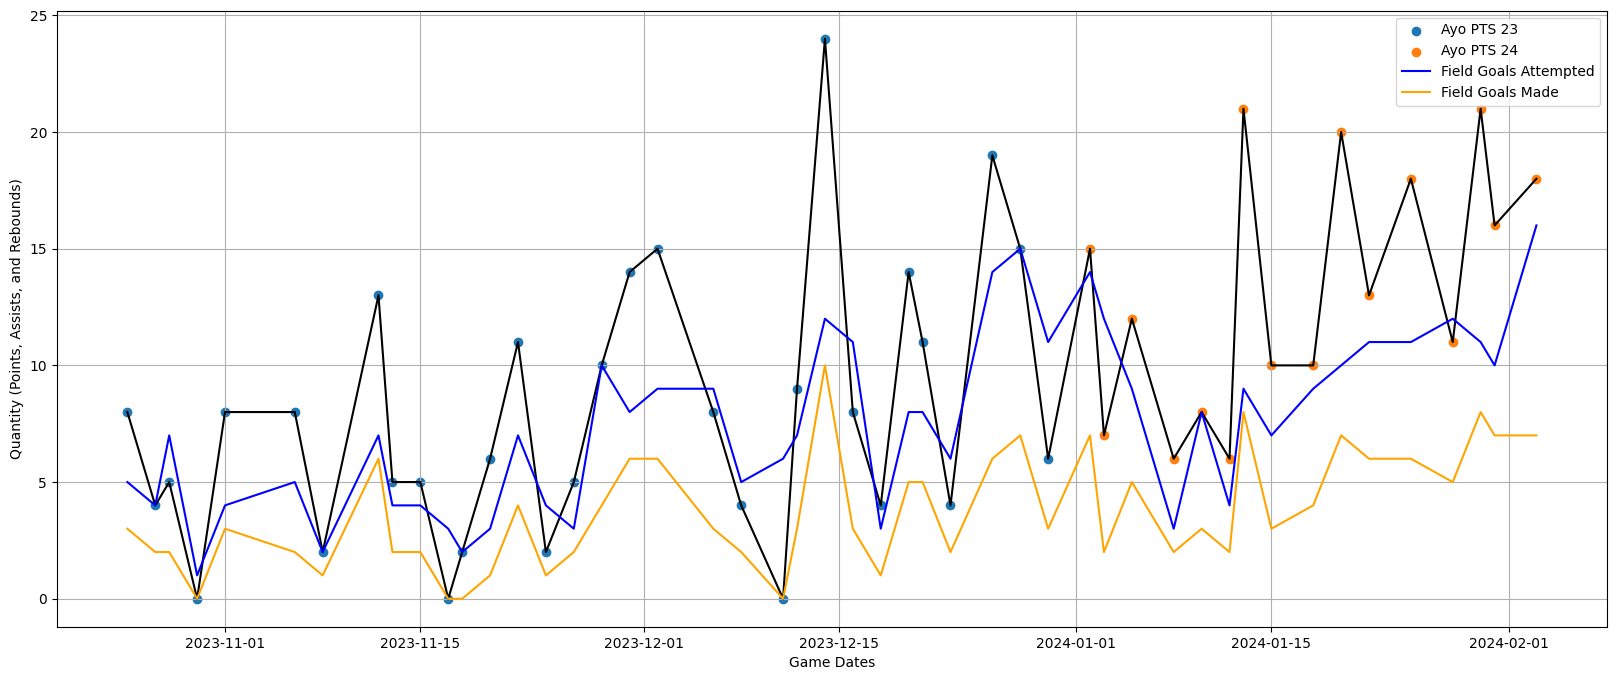

In [50]:
plt.figure(figsize=(20, 8))
plt.scatter(nba23['Date'], nba23['PTS'], label='Ayo PTS 23')
plt.scatter(nba24['Date'], nba24['PTS'], label='Ayo PTS 24')
plt.plot(df1['Date'], df1['PTS'], color = 'black')
# plt.plot(df1['Date'], df1['AST'], color = 'red', label='Assists')
# plt.plot(df1['Date'], df1['TRB'], color = 'green', label='Rebounds')
plt.plot(df1['Date'], df1['FGA'], color = 'blue', label='Field Goals Attempted')
plt.plot(df1['Date'], df1['FG'], color = 'orange', label='Field Goals Made')
plt.xlabel('Game Dates')
plt.ylabel('Quantity (Points, Assists, and Rebounds)')
plt.grid()
plt.legend()

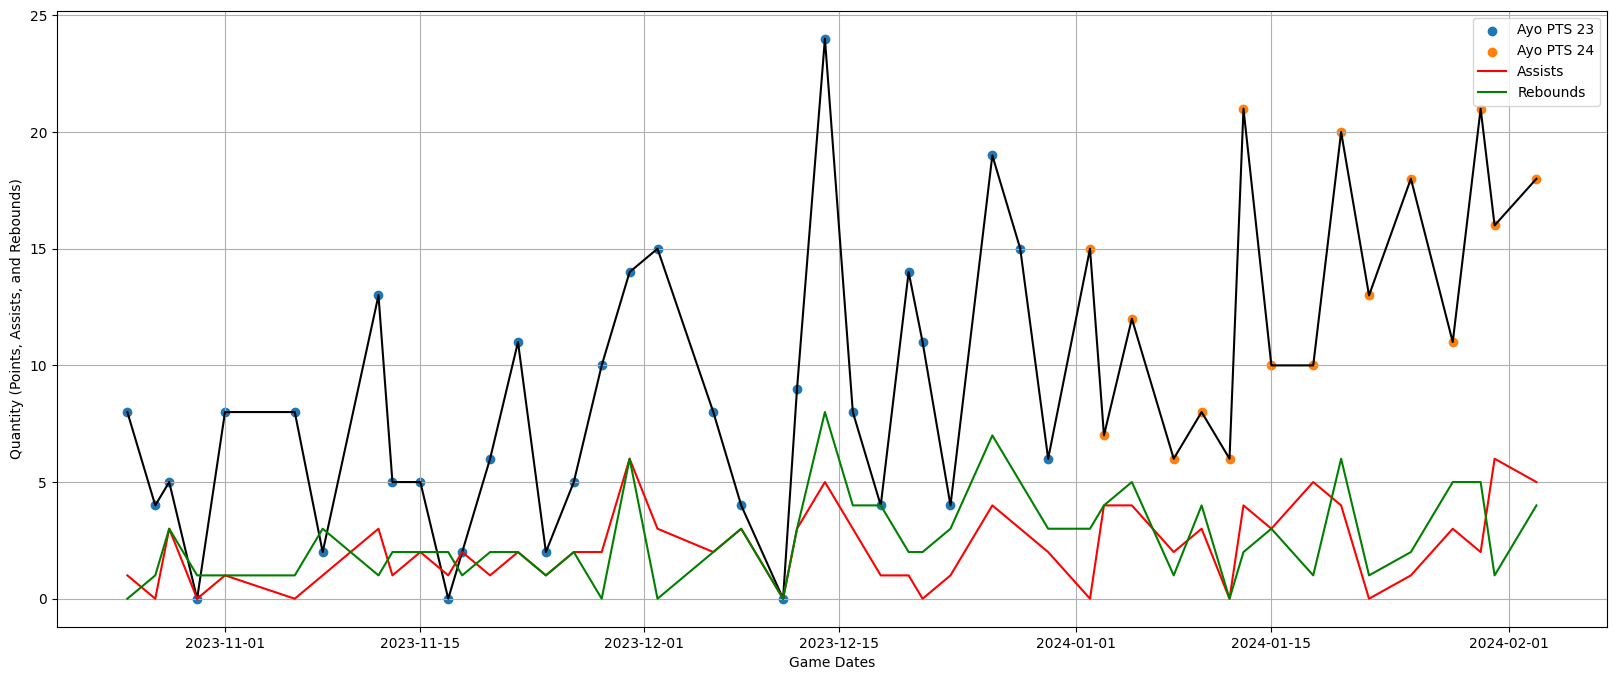

In [51]:
plt.figure(figsize=(20, 8))
plt.scatter(nba23['Date'], nba23['PTS'], label='Ayo PTS 23')
plt.scatter(nba24['Date'], nba24['PTS'], label='Ayo PTS 24')
plt.plot(df1['Date'], df1['PTS'], color = 'black')
plt.plot(df1['Date'], df1['AST'], color = 'red', label='Assists')
plt.plot(df1['Date'], df1['TRB'], color = 'green', label='Rebounds')
# plt.plot(df1['Date'], df1['FGA'], color = 'blue', label='Field Goals Attempted')
# plt.plot(df1['Date'], df1['FG'], color = 'orange', label='Field Goals Made')
plt.xlabel('Game Dates')
plt.ylabel('Quantity (Points, Assists, and Rebounds)')
plt.grid()
plt.legend()

<ipython-input-61-f64c451775d0>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



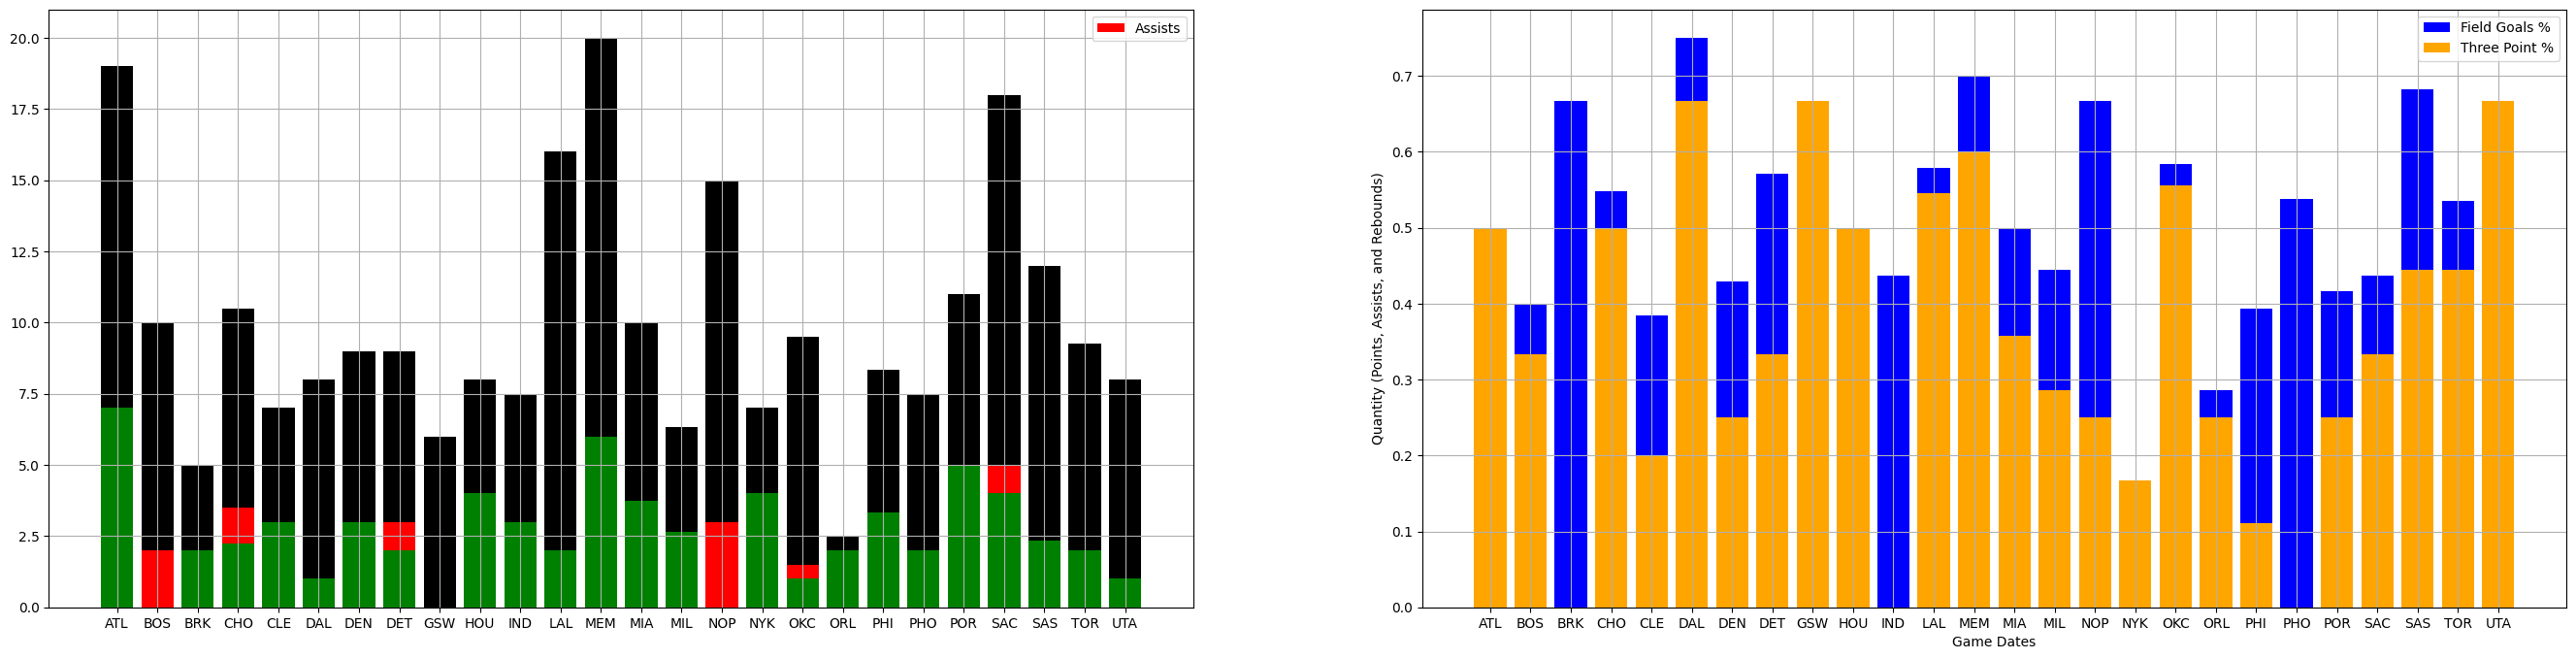

In [61]:
plt.figure(figsize=(70, 8))
plt.scatter(nba23['Date'], nba23['PTS'], label='Ayo PTS 23')
plt.scatter(nba24['Date'], nba24['PTS'], label='Ayo PTS 24')
plt.subplot(1,4,1); plt.bar(ayostat['Opp'], ayostat['PPG'], color = 'black')
plt.subplot(1,4,1); plt.bar(ayostat['Opp'], ayostat['APG'], color = 'red', label='Assists')
plt.grid()
plt.legend()
plt.subplot(1,4,1); plt.bar(ayostat['Opp'], ayostat['RPG'], color = 'green', label='Rebounds')
plt.subplot(1,4,2); plt.bar(ayostat['Opp'], ayostat['FG%'], color = 'blue', label='Field Goals %')
plt.subplot(1,4,2); plt.bar(ayostat['Opp'], ayostat['3P%'], color = 'orange', label='Three Point %')
plt.xlabel('Game Dates')
plt.ylabel('Quantity (Points, Assists, and Rebounds)')
plt.grid()
plt.legend()


In [43]:
px.scatter(ayostat, x=ayostat.Opp, y=ayostat.PPG, color = ayostat.PPG, size= ayostat.PPG)